## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading the dataset

In [2]:
dataKNN = pd.read_csv("C:\\Users\\Hana\\Desktop\\heart desease dataset.csv")

In [3]:
dataKNN.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataKNN[dataKNN['target']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
dataKNN[['ca','target']].sort_values('target')

,ca,target
302,1,0
200,1,0
201,1,0
202,0,0
203,0,0
...,...,...
98,1,1
97,3,1
96,0,1
94,0,1


In [6]:
dataKNN['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [7]:
sorted(list(dataKNN['ca'].unique()))

[0, 1, 2, 3, 4]

age: The person's age in years
sex: The person's sex (1 = male, 0 = female)
cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
chol: The person's cholesterol measurement in mg/dl
fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
thalach: The person's maximum heart rate achieved
exang: Exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
ca: The number of major vessels (0-3)
thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
target: Heart disease (0 = no, 1 = yes)

In [8]:
data = pd.read_csv("C:\\Users\\Hana\\Desktop\\heart desease dataset.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
data['restecg'].unique

<bound method Series.unique of 0      0
1      1
2      0
3      1
4      1
      ..
298    1
299    1
300    1
301    1
302    0
Name: restecg, Length: 303, dtype: int64>

In [10]:
data.describe().loc['std']

age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
Name: std, dtype: float64

### Normalization for Naive Bayes

In [11]:
def Normalization(x,std):
    f = x/pow(std,2)
    return f

In [271]:
for i in continuous_features:
    data[i] = data[i].map(lambda x: Normalization(x,  data[i].std()))

In [272]:
data.columns.drop('target')

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [273]:
#for i in list(data.columns.drop('target')):
for i in continuous_features:
    data[i] = data[i].map(lambda x: Normalization(x,  data[i].std()))

In [274]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37.0,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41.0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57.0,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1


In [275]:
data[['sex','target']].sort_values('target')

,sex,target
302,0,0
200,1,0
201,1,0
202,1,0
203,1,0
...,...,...
98,1,1
97,1,1
96,0,1
94,0,1


In [276]:
labels = sorted(list(data['target'].unique()))
labels

[0, 1]

In [181]:
data[(data['target']==0) & (data['sex']==0)]['sex'].count()/data[data['target']==0]['target'].count()

0.17391304347826086

In [182]:
import seaborn as sns

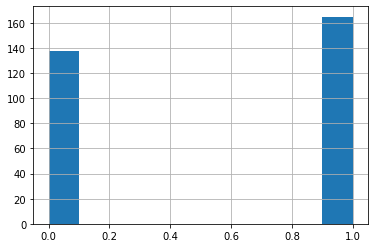

In [183]:
data['target'].hist()

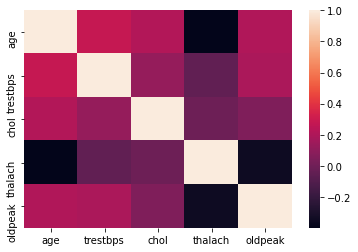

In [184]:
## Check if features are independent because for naive they should be!
corr = data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].corr(method='pearson')
sns.heatmap(corr)

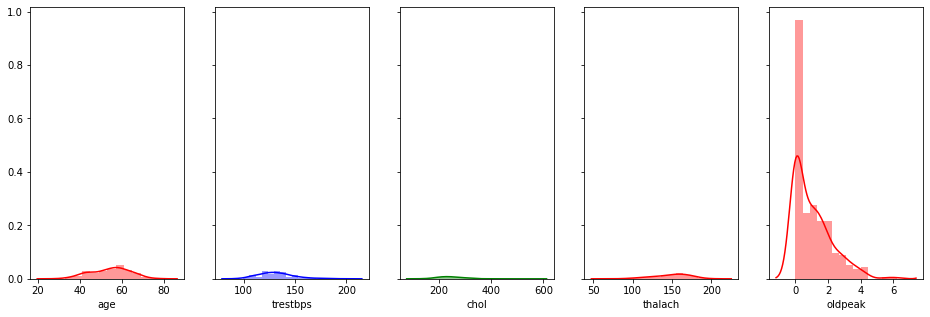

In [185]:
fig, axes = plt.subplots(1,5, figsize = (16,5),sharey=True)
sns.distplot(data['age'], ax=axes[0],  kde=True, color='r')
sns.distplot(data['trestbps'], ax=axes[1], kde=True, color='blue')
sns.distplot(data['chol'], ax=axes[2], kde=True, color='green')
sns.distplot(data['thalach'], ax=axes[3], kde=True, color='r')
sns.distplot(data['oldpeak'], ax=axes[4],  kde=True, color='r')

In [304]:
## Split the data
training_set_naive = data.sample(frac=0.8, random_state= 201)
testing_set_naive = data.drop(training_set_naive.index)

In [305]:
## First we need to sort the train and test data based on the target
training_set_naive_target0= training_set_naive[training_set_naive['target']==0]
training_set_naive_target1 = training_set_naive[training_set_naive['target']==1]
testing_set_naive_target0 = testing_set_naive[testing_set_naive['target']==0]
testing_set_naive_target1 = testing_set_naive[testing_set_naive['target']==1]
training_set_naive = pd.concat([training_set_naive_target0,training_set_naive_target1])
testing_set_naive = pd.concat([testing_set_naive_target0,testing_set_naive_target1])

In [306]:
training_set_naive_target0.shape

(114, 14)

In [307]:
training_set_naive_target1.shape

(128, 14)

In [308]:
testing_set_naive_target0.shape

(24, 14)

In [309]:
testing_set_naive_target1.shape

(37, 14)

### Define the Prior probability >>>>>> P(Y=y)

In [195]:
sorted(data['target'].unique())

[0, 1]

In [196]:
def PriorCalculator(data, y):
    """""
    This is a function to calculate 
    the Prior probability for each class
    """""
    prior = []
    classes = sorted(list(data[y].unique()))
    for i in classes:
        prior.append(data[y].value_counts()[i])
    return prior
PriorCalculator(data,'target')

[138, 165]

### Define the likelihood  >>>>>> P(X=x|Y=y)

In [263]:
lst = sorted(list(training_set_naive['sex'].unique()))
sex = np.zeros([len(lst),2])
for j in labels:
    for m in lst:
        sex[m,j] = (training_set_naive[(training_set_naive['target']==j) & (training_set_naive['sex']==m)]['sex'].count()
                             /training_set_naive[training_set_naive['target']==j]['target'].count()) 
sex
    

array([[0.15789474, 0.4453125 ],
       [0.84210526, 0.5546875 ]])

In [264]:
lst = sorted(list(training_set_naive['cp'].unique()))
cp = np.zeros([len(lst),2])
for j in labels:
    for m in lst:
        cp[m,j] = (training_set_naive[(training_set_naive['target']==j) & (training_set_naive['cp']==m)]['cp'].count()
                             /training_set_naive[training_set_naive['target']==j]['target'].count()) 
cp

array([[0.78070175, 0.265625  ],
       [0.05263158, 0.2734375 ],
       [0.13157895, 0.375     ],
       [0.03508772, 0.0859375 ]])

In [265]:
lst = sorted(list(training_set_naive['fbs'].unique()))
fbs = np.zeros([len(lst),2])
for j in labels:
    for m in lst:
        fbs[m,j] = (training_set_naive[(training_set_naive['target']==j) & (training_set_naive['fbs']==m)]['fbs'].count()
                             /training_set_naive[training_set_naive['target']==j]['target'].count()) 
fbs

array([[0.84210526, 0.8828125 ],
       [0.15789474, 0.1171875 ]])

In [266]:

lst = sorted(list(training_set_naive['restecg'].unique()))
restecg = np.zeros([len(lst),2])
for j in labels:
    for m in lst:
        restecg[m,j] = (training_set_naive[(training_set_naive['target']==j) & (training_set_naive['restecg']==m)]['restecg'].count()
                             /training_set_naive[training_set_naive['target']==j]['target'].count()) 
restecg

array([[0.57017544, 0.4296875 ],
       [0.40350877, 0.5703125 ],
       [0.02631579, 0.        ]])

In [303]:
lst = sorted(list(training_set_naive['exang'].unique()))
exang = np.zeros([len(lst),2])
for j in labels:
    for m in lst:
        exang[m,j] = (training_set_naive[(training_set_naive['target']==j) & (training_set_naive['exang']==m)]['exang'].count()
                             /training_set_naive[training_set_naive['target']==j]['target'].count()) 
exang

array([[0.42982456, 0.8671875 ],
       [0.57017544, 0.1328125 ]])

In [267]:
lst = sorted(list(training_set_naive['slope'].unique()))
slope = np.zeros([len(lst),2])
for j in labels:
    for m in lst:
        slope[m,j] = (training_set_naive[(training_set_naive['target']==j) & (training_set_naive['slope']==m)]['slope'].count()
             /training_set_naive[training_set_naive['target']==j]['target'].count()) 
slope

array([[0.0877193 , 0.0625    ],
       [0.65789474, 0.28125   ],
       [0.25438596, 0.65625   ]])

In [268]:

lst = sorted(list(training_set_naive['ca'].unique()))
ca = np.zeros([len(lst),2])
for j in labels:
    for m in lst:
        ca[m,j] = (training_set_naive[(training_set_naive['target']==j) & (training_set_naive['ca']==m)]['ca'].count()
                             /training_set_naive[training_set_naive['target']==j]['target'].count()) 
ca

array([[0.3245614 , 0.7734375 ],
       [0.3245614 , 0.125     ],
       [0.21052632, 0.0546875 ],
       [0.13157895, 0.0234375 ],
       [0.00877193, 0.0234375 ]])

In [270]:

lst = sorted(list(training_set_naive['thal'].unique()))
thal = np.zeros([len(lst),2])
for j in labels:
    for m in lst:
        thal[m,j] = (training_set_naive[(training_set_naive['target']==j) & (training_set_naive['thal']==m)]['thal'].count()
                             /training_set_naive[training_set_naive['target']==j]['target'].count()) 
thal

array([[0.00877193, 0.0078125 ],
       [0.09649123, 0.03125   ],
       [0.25438596, 0.8125    ],
       [0.64035088, 0.1484375 ]])

In [27]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
discrete_features = list(data.columns.drop(continuous_features+['target']))
discrete_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [213]:
from scipy import stats

In [295]:
# Compute posterior probability for continuous features
for i, t in testing_set_naive.iterrows():
    continuous_target0=stats.norm(training_set_naive_target0['age'].mean(), training_set_naive_target0['age'].std()).pdf(t['age'])*stats.norm(training_set_naive_target0['trestbps'].mean(), training_set_naive_target0['trestbps'].std()).pdf(t['trestbps'])*stats.norm(training_set_naive_target0['chol'].mean(), training_set_naive_target0['chol'].std()).pdf(t['chol'])*stats.norm(training_set_naive_target0['thalach'].mean(), training_set_naive_target0['thalach'].std()).pdf(t['thalach'])*stats.norm(training_set_naive_target0['oldpeak'].mean(), training_set_naive_target0['oldpeak'].std()).pdf(t['oldpeak'])
    continuous_target1=stats.norm(training_set_naive_target1['age'].mean(), training_set_naive_target1['age'].std()).pdf(t['age'])*stats.norm(training_set_naive_target1['trestbps'].mean(), training_set_naive_target1['trestbps'].std()).pdf(t['trestbps'])*stats.norm(training_set_naive_target1['chol'].mean(), training_set_naive_target1['chol'].std()).pdf(t['chol'])*stats.norm(training_set_naive_target1['thalach'].mean(), training_set_naive_target1['thalach'].std()).pdf(t['thalach'])*stats.norm(training_set_naive_target1['oldpeak'].mean(), training_set_naive_target1['oldpeak'].std()).pdf(t['oldpeak'])
#Compute posterior probability for discrete features 
    discrete_target1 = sex[int(t["sex"]), 1] * cp[int(t["cp"]), 1] * fbs[int(t["fbs"]), 1] * restecg[int(t["restecg"]), 1] * exang[int(t["exang"]), 1] * slope[int(t["slope"]), 1] * ca[int(t["ca"]), 1] * thal[int(t["thal"]), 1] 
    discrete_target0 = sex[int(t["sex"]), 0] * cp[int(t["cp"]), 0] * fbs[int(t["fbs"]), 0] * restecg[int(t["restecg"]), 0] * exang[int(t["exang"]), 0] * slope[int(t["slope"]), 0] * ca[int(t["ca"]), 0] * thal[int(t["thal"]), 0] 
    prob_target0 = discrete_target0*continuous_target0
    prob_target1 = continuous_target1*discrete_target1
    if prob_target1 > prob_target0:
    #testing_set_naive.loc[i, "PredictedTarget"] = prob_target1 > prob_target0
        testing_set_naive.loc[i, "PredictedTarget"] = int(1)
    else:
        testing_set_naive.loc[i, "PredictedTarget"] = int(0)

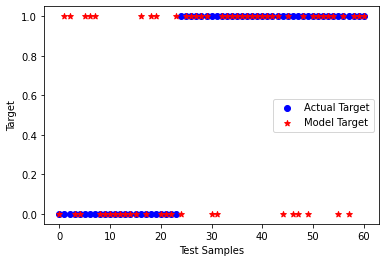

In [281]:
plt.scatter(np.arange(0,testing_set_naive.shape[0],1), testing_set_naive["target"], c='blue', label='Actual Target')
plt.scatter(np.arange(0,testing_set_naive.shape[0],1), testing_set_naive["PredictedTarget"], c='red', marker='*', label='Model Target')
plt.xlabel("Test Samples")
plt.ylabel("Target")
plt.legend(loc='center right')
plt.show()

In [296]:
testing_set_naive["target"]

170    0
171    0
172    0
176    0
180    0
      ..
146    1
152    1
153    1
156    1
163    1
Name: target, Length: 61, dtype: int64

In [301]:
testing_set_naive["PredictedTarget"]

170    0
171    1
172    1
176    0
180    0
      ..
146    1
152    0
153    1
156    1
163    1
Name: PredictedTarget, Length: 61, dtype: object

In [302]:
n = testing_set_naive.shape[0]
TP = sum((testing_set_naive["PredictedTarget"] == testing_set_naive["target"]) & (testing_set_naive["PredictedTarget"] == 1))
TN = sum((testing_set_naive["PredictedTarget"] == testing_set_naive["target"]) & (testing_set_naive["PredictedTarget"] == 0))
FN = sum(testing_set_naive["PredictedTarget"] < testing_set_naive["target"])
FP = sum(testing_set_naive["PredictedTarget"] > testing_set_naive["target"])
confusionMatrix = np.array([[TP/n, FN/n],[FP/n, TN/n]])
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 / ((1 / precision) + (1 / recall))
print('ConfusionMatrix =\n{}\n'.format(confusionMatrix))
print('Accuracy = \n{}\n'.format(accuracy))
print('Precision = \n {}\n.'.format(precision))
print('Recall = \n{}\n'.format(recall))
print('F1_score = \n{}\n'.format(f1_score))

ConfusionMatrix =
[[0.45901639 0.14754098]
 [0.14754098 0.24590164]]

Accuracy = 
0.7049180327868853

Precision = 
 0.7567567567567568
.
Recall = 
0.7567567567567568

F1_score = 
0.7567567567567568



## Normalization for KNN

In [21]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [22]:
# define the transformation function for continues features
def Transform(x, mean, std):
    f = (x - mean)/std
    return f 

In [23]:
# Apply the Transform function to each continues feature of the dataset
for i in continuous_features: 
    dataKNN[i] = dataKNN[i].map(lambda x: Transform(x, dataKNN[i].mean(), dataKNN[i].std()))
        

In [24]:
dataKNN.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.950624,1,3,0.762694,-0.255910,1,0,0.015417,0,1.085542,0,0,1,1
1,-1.912150,1,2,-0.092585,0.072080,0,1,1.630774,0,2.119067,0,0,2,1
2,-1.471723,0,1,-0.092585,-0.815424,0,0,0.975900,0,0.310399,2,0,2,1
3,0.179877,1,1,-0.662770,-0.198030,0,1,1.237849,0,-0.206364,2,0,2,1
4,0.289984,0,0,-0.662770,2.078611,0,1,0.582975,1,-0.378618,2,0,2,1


In [28]:
discrete_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [29]:
dataKNN = pd.get_dummies(dataKNN, columns=discrete_features)

In [30]:
dataKNN

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.950624,0.762694,-0.255910,0.015417,1.085542,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.912150,-0.092585,0.072080,1.630774,2.119067,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.471723,-0.092585,-0.815424,0.975900,0.310399,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.179877,-0.662770,-0.198030,1.237849,-0.206364,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.289984,-0.662770,2.078611,0.582975,-0.378618,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.289984,0.477601,-0.101562,-1.163356,-0.723126,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.031296,-1.232956,0.342190,-0.770432,0.138144,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.501157,0.705675,-1.027653,-0.377507,2.032940,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.289984,-0.092585,-2.223854,-1.512623,0.138144,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [31]:
## Check if the transform function is applied correctly
dataKNN['age']

0      0.950624
1     -1.912150
2     -1.471723
3      0.179877
4      0.289984
         ...   
298    0.289984
299   -1.031296
300    1.501157
301    0.289984
302    0.289984
Name: age, Length: 303, dtype: float64

In [32]:
dataKNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   trestbps   303 non-null    float64
 2   chol       303 non-null    float64
 3   thalach    303 non-null    float64
 4   oldpeak    303 non-null    float64
 5   target     303 non-null    int64  
 6   sex_0      303 non-null    uint8  
 7   sex_1      303 non-null    uint8  
 8   cp_0       303 non-null    uint8  
 9   cp_1       303 non-null    uint8  
 10  cp_2       303 non-null    uint8  
 11  cp_3       303 non-null    uint8  
 12  fbs_0      303 non-null    uint8  
 13  fbs_1      303 non-null    uint8  
 14  restecg_0  303 non-null    uint8  
 15  restecg_1  303 non-null    uint8  
 16  restecg_2  303 non-null    uint8  
 17  exang_0    303 non-null    uint8  
 18  exang_1    303 non-null    uint8  
 19  slope_0    303 non-null    uint8  
 20  slope_1   

In [33]:
#Check the mean and std of continuous features
dataKNN[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,1.315413e-16,-7.526066e-16,-8.839647e-17,-5.466841e-16,1.586556e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.793003e+00,-2.145254e+00,-2.320322e+00,-3.433587e+00,-8.953805e-01
25%,-7.560295e-01,-6.627704e-01,-6.803688e-01,-7.049444e-01,-8.953805e-01
50%,6.977057e-02,-9.258463e-02,-1.208554e-01,1.463921e-01,-2.063639e-01
75%,7.304107e-01,4.776012e-01,5.447726e-01,7.139498e-01,4.826527e-01
max,2.492118e+00,3.898716e+00,6.130260e+00,2.285648e+00,4.444498e+00


## Visualization

In [34]:
import seaborn as sns

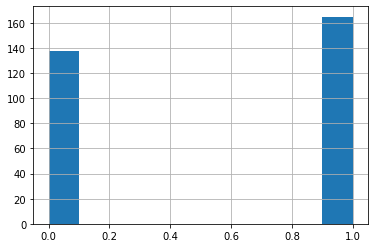

In [35]:
dataKNN['target'].hist()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


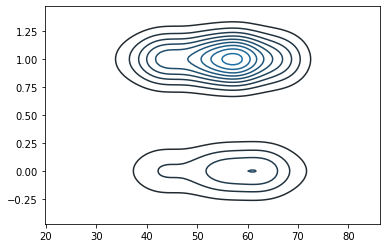

In [36]:
sns.kdeplot(data)

## Splitting the dataset 

In [42]:
training_set_naive = data.sample(frac=0.8, random_state= 201)
testing_set_naive = data.drop(training_set_naive.index)

In [43]:
training_set_naive.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0


In [45]:
print('Number of training samples: {}\nNumber of testing samples: {}'.format(training_set_naive.shape[0],testing_set_naive.shape[0]))

Number of training samples: 242
Number of testing samples: 61


In [47]:
testing_set_naive.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [48]:
training_set_naive.info()      # 238 cases we have in training set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 48 to 118
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
 13  target    242 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 28.4 KB


In [50]:
testing_set_naive.info()    # we have 59 cases in our testing set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       61 non-null     int64  
 1   sex       61 non-null     int64  
 2   cp        61 non-null     int64  
 3   trestbps  61 non-null     int64  
 4   chol      61 non-null     int64  
 5   fbs       61 non-null     int64  
 6   restecg   61 non-null     int64  
 7   thalach   61 non-null     int64  
 8   exang     61 non-null     int64  
 9   oldpeak   61 non-null     float64
 10  slope     61 non-null     int64  
 11  ca        61 non-null     int64  
 12  thal      61 non-null     int64  
 13  target    61 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 7.1 KB


In [86]:
training_KNN = dataKNN.sample(frac=0.6, random_state=201)
validation_KNN = dataKNN.drop(training_KNN.index).sample(frac=0.5,random_state=201)
testing_KNN = dataKNN.drop(training_KNN.index).drop(validation_KNN.index)

In [87]:
training_KNN.shape

(182, 31)

In [88]:
validation_KNN.shape

(60, 31)

In [129]:
validation_KNN.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
144,2.382011,0.477601,-0.950479,-1.468964,0.052017,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
201,0.620304,-0.377678,0.226429,-0.377507,1.516178,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
116,-1.471723,-0.092585,-0.622488,0.801266,0.827161,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.471723,-0.092585,-0.815424,0.975900,0.310399,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
288,0.289984,-1.232956,1.712033,-0.290191,1.688432,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [335]:
euclidean(training_KNN.iloc[48],validation_KNN.iloc[144])

IndexError: single positional indexer is out-of-bounds

In [89]:
testing_KNN.shape

(61, 31)

In [90]:
# Defining the Euclidean Distance
def euclidean(p,q):
    dist = np.sqrt(np.sum((p-q)**2))
    return dist

In [133]:
k=1
lstnew = []
lst_target = []
lst_index_new =[]

for j in validation_KNN.index:
    #i=0
    lst = []

    lst_index = []
    #df = pd.DataFrame({'value':lst,'index':lst_index, 'tar'})
    for i in training_KNN.index:
        lst.append(euclidean(training_KNN.loc[i],validation_KNN.loc[j]))
#         print(lst)
        lst_index.append(i)
    df = pd.DataFrame({'value':lst,'index':lst_index, 'target':training_KNN.loc[lst_index]['target']})
#     print(df)
#     print(df)
    df1 = df.sort_values(by='value')
    lstnew.append(df1['value'].iloc[0])
    lst_target.append(df1['target'].iloc[0])
    lst_index_new.append(j)

df2 = pd.DataFrame({'value':lstnew,'indexes':lst_index_new, 'target':lst_target})  
print(df2)

       value  indexes  target
0   2.066374      144       1
1   1.529192      201       0
2   1.943620      116       1
3   1.738071        2       1
4   1.702100      288       0
5   2.223508       25       1
6   2.177625      295       0
7   1.872426       69       1
8   2.415665      141       1
9   1.013624      162       1
10  2.258764       90       1
11  0.427484       74       1
12  2.354961       94       1
13  2.066872      293       0
14  1.880734      283       1
15  1.645163       95       0
16  2.920153      263       0
17  2.091455      170       0
18  1.523315       41       1
19  3.536129      266       0
20  1.579852      124       1
21  2.417109      255       0
22  3.620414      223       1
23  2.109322        9       1
24  0.851770      175       0
25  1.700290      160       1
26  2.771647       23       0
27  2.135743      130       1
28  1.927726      190       0
29  1.915450      182       1
30  2.386020       24       1
31  2.176887      171       1
32  2.0809

In [137]:
df2 = df2.sort_values(by='indexes')

In [138]:

df2

,value,indexes,target
3,1.738071,2,1
55,0.971322,6,1
23,2.109322,9,1
35,1.775691,11,1
26,2.771647,23,0
30,2.386020,24,1
5,2.223508,25,1
49,2.302299,37,1
18,1.523315,41,1
42,1.585108,53,1


In [139]:
validation_KNN.sort_index()['target'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [140]:
pd.Series(validation_KNN.sort_index()['target'].values)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
dtype: int64

In [148]:
df2 = df2.assign(Target_true_values=pd.Series(validation_KNN.sort_index()['target']).values)

In [149]:
df2

,value,indexes,target,Target_true_values
3,1.738071,2,1,1
55,0.971322,6,1,1
23,2.109322,9,1,1
35,1.775691,11,1,1
26,2.771647,23,0,1
30,2.386020,24,1,1
5,2.223508,25,1,1
49,2.302299,37,1,1
18,1.523315,41,1,1
42,1.585108,53,1,1


In [150]:
df2

,value,indexes,target,Target_true_values
3,1.738071,2,1,1
55,0.971322,6,1,1
23,2.109322,9,1,1
35,1.775691,11,1,1
26,2.771647,23,0,1
30,2.386020,24,1,1
5,2.223508,25,1,1
49,2.302299,37,1,1
18,1.523315,41,1,1
42,1.585108,53,1,1


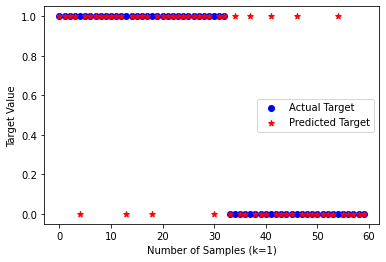

In [151]:
plt.scatter(np.arange(0,df2.shape[0],1), df2["Target_true_values"], c='blue', label='Actual Target')
plt.scatter(np.arange(0,df2.shape[0],1), df2["target"], c='red', marker='*', label='Predicted Target')
plt.xlabel('Number of Samples (k=1)')
plt.ylabel("Target Value")
plt.legend(loc='center right')
plt.show()

In [152]:
# Calculating the evaluation
n = df2.shape[0]
TP = sum((df2["target"] == df2["Target_true_values"]) & (df2["target"] == True))
TN = sum((df2["target"] == df2["Target_true_values"]) & (df2["target"]== False))
FN = sum(df2["target"] < df2["Target_true_values"])
FP = sum(df2["target"] > df2["Target_true_values"])
confusionMatrix = np.array([[TP/n, FN/n],[FP/n, TN/n]])
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 / ((1 / precision) + (1 / recall))
print('ConfusionMatrix =\n{}\n'.format(confusionMatrix))
print('Accuracy = \n{}\n'.format(accuracy))
print('Precision = \n {}\n'.format(precision))
print('Recall = \n{}\n'.format(recall))
print('F1_score = \n{}\n'.format(f1_score))

ConfusionMatrix =
[[0.48333333 0.06666667]
 [0.08333333 0.36666667]]

Accuracy = 
0.85

Precision = 
 0.8529411764705882

Recall = 
0.8787878787878788

F1_score = 
0.8656716417910446



In [153]:
k=3
lstnew = []
lst_target = []
lst_index_new =[]

arr_min = np.zeros([validation_KNN.shape[0],2])
for j in validation_KNN.index:
    #i=0
    lst = []

    lst_index = []
    #df = pd.DataFrame({'value':lst,'index':lst_index, 'tar'})
    for i in training_KNN.index:
        lst.append(euclidean(training_KNN.loc[i],validation_KNN.loc[j]))
#         print(lst)
        lst_index.append(i)
    df = pd.DataFrame({'value':lst,'index':lst_index, 'target':training_KNN.loc[lst_index]['target']})
#     print(df)
#     print(df)

    df1 = df.sort_values(by='value')
#     print(df1)
    if df1['target'].iloc[0]+df1['target'].iloc[1]+df1['target'].iloc[20]>k/2:
    #lstnew.append(df1['value'].iloc[0])
        lst_target.append(1)
    else:
        lst_target.append(0)
    lst_index_new.append(j)

df2 = pd.DataFrame({'index':lst_index_new, 'target':lst_target}) 

In [154]:
df2= df2.sort_values(by='index')
df2

,index,target
3,2,1
55,6,1
23,9,1
35,11,1
26,23,1
30,24,1
5,25,1
49,37,1
18,41,1
42,53,1


In [158]:
df2 = df2.assign(Target_true_values=pd.Series(validation_KNN.sort_index()['target']).values)

In [159]:
df2

,index,target,Target_true_values
3,2,1,1
55,6,1,1
23,9,1,1
35,11,1,1
26,23,1,1
30,24,1,1
5,25,1,1
49,37,1,1
18,41,1,1
42,53,1,1


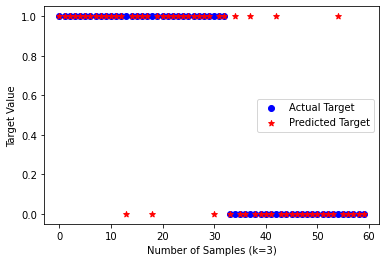

In [160]:
plt.scatter(np.arange(0,df2.shape[0],1), df2["Target_true_values"], c='blue', label='Actual Target')
plt.scatter(np.arange(0,df2.shape[0],1), df2["target"], c='red', marker='*', label='Predicted Target')
plt.xlabel('Number of Samples (k=3)')
plt.ylabel("Target Value")
plt.legend(loc='center right')
plt.show()

In [161]:
# Calculating the evaluation
n = df2.shape[0]
TP = sum((df2["target"] == df2["Target_true_values"]) & (df2["target"] == True))
TN = sum((df2["target"] == df2["Target_true_values"]) & (df2["target"]== False))
FN = sum(df2["target"] < df2["Target_true_values"])
FP = sum(df2["target"] > df2["Target_true_values"])
confusionMatrix = np.array([[TP/n, FN/n],[FP/n, TN/n]])
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 / ((1 / precision) + (1 / recall))
print('ConfusionMatrix =\n{}\n'.format(confusionMatrix))
print('Accuracy = \n{}\n'.format(accuracy))
print('Precision = \n {}\n.'.format(precision))
print('Recall = \n{}\n'.format(recall))
print('F1_score = \n{}\n'.format(f1_score))

ConfusionMatrix =
[[0.5        0.05      ]
 [0.06666667 0.38333333]]

Accuracy = 
0.8833333333333333

Precision = 
 0.8823529411764706
.
Recall = 
0.9090909090909091

F1_score = 
0.8955223880597015



In [162]:
k=5
lstnew = []
lst_target = []
lst_index_new =[]

arr_min = np.zeros([validation_KNN.shape[0],2])
for j in validation_KNN.index:
    #i=0
    lst = []

    lst_index = []
    #df = pd.DataFrame({'value':lst,'index':lst_index, 'tar'})
    for i in training_KNN.index:
        lst.append(euclidean(training_KNN.loc[i],validation_KNN.loc[j]))
#         print(lst)
        lst_index.append(i)
    df = pd.DataFrame({'value':lst,'index':lst_index, 'target':training_KNN.loc[lst_index]['target']})
#     print(df)
#     print(df)

    df1 = df.sort_values(by='value')
#     print(df1)
    if df1['target'].iloc[0]+df1['target'].iloc[1]+df1['target'].iloc[20]>k/2:
    #lstnew.append(df1['value'].iloc[0])
        lst_target.append(1)
    else:
        lst_target.append(0)
    lst_index_new.append(j)


df2 = pd.DataFrame({'index':lst_index_new, 'target':lst_target}) 

In [166]:
df2 = df2.assign(Target_true_values=pd.Series(validation_KNN.sort_index()['target']).values)
df2

,index,target,Target_true_values
3,2,1,1
55,6,0,1
23,9,1,1
35,11,1,1
26,23,0,1
30,24,1,1
5,25,0,1
49,37,1,1
18,41,1,1
42,53,1,1


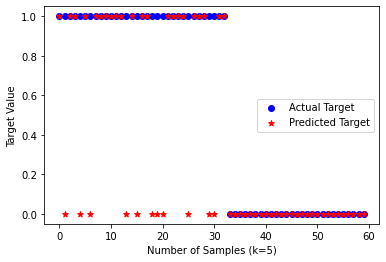

In [167]:
plt.scatter(np.arange(0,df2.shape[0],1), df2["Target_true_values"], c='blue', label='Actual Target')
plt.scatter(np.arange(0,df2.shape[0],1), df2["target"], c='red', marker='*', label='Predicted Target')
plt.xlabel('Number of Samples (k=5)')
plt.ylabel("Target Value")
plt.legend(loc='center right')
plt.show()

In [168]:
# Calculating the evaluation
n = df2.shape[0]
TP = sum((df2["target"] == df2["Target_true_values"]) & (df2["target"] == True))
TN = sum((df2["target"] == df2["Target_true_values"]) & (df2["target"]== False))
FN = sum(df2["target"] < df2["Target_true_values"])
FP = sum(df2["target"] > df2["Target_true_values"])
confusionMatrix = np.array([[TP/n, FN/n],[FP/n, TN/n]])
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 / ((1 / precision) + (1 / recall))
print('ConfusionMatrix =\n{}\n'.format(confusionMatrix))
print('Accuracy = \n{}\n'.format(accuracy))
print('Precision = \n {}\n.'.format(precision))
print('Recall = \n{}\n'.format(recall))
print('F1_score = \n{}\n'.format(f1_score))

ConfusionMatrix =
[[0.36666667 0.18333333]
 [0.         0.45      ]]

Accuracy = 
0.8166666666666667

Precision = 
 1.0
.
Recall = 
0.6666666666666666

F1_score = 
0.8



In [173]:
k=3
lstnew = []
lst_target = []
lst_index_new =[]

for j in testing_KNN.index:
    lst = []
    lst_index = []
    for i in training_KNN.index:
        lst.append(euclidean(training_KNN.loc[i],testing_KNN.loc[j]))
        lst_index.append(i)
    df = pd.DataFrame({'value':lst,'index':lst_index, 'target':training_KNN.loc[lst_index]['target']})
    print(df)
#     print(df)

    df1 = df.sort_values(by='value')
#     print(df1)
    if df1['target'].iloc[0]+df1['target'].iloc[1]+df1['target'].iloc[20]>k/2:
    #lstnew.append(df1['value'].iloc[0])
        lst_target.append(1)
    else:
        lst_target.append(0)
    lst_index_new.append(j)


df2 = pd.DataFrame({'index':lst_index_new, 'target':lst_target})

        value  index  target
48   4.303308     48       1
212  4.638353    212       0
111  4.365673    111       1
72   5.668977     72       1
187  4.362636    187       0
..        ...    ...     ...
157  5.183853    157       1
214  3.735769    214       0
281  3.878377    281       0
185  4.905881    185       0
109  4.502676    109       1

[182 rows x 3 columns]
        value  index  target
48   4.062748     48       1
212  3.673593    212       0
111  3.969502    111       1
72   3.621730     72       1
187  4.895316    187       0
..        ...    ...     ...
157  2.566196    157       1
214  3.932717    214       0
281  3.568672    281       0
185  3.421306    185       0
109  2.836369    109       1

[182 rows x 3 columns]
        value  index  target
48   4.488830     48       1
212  4.582626    212       0
111  5.880979    111       1
72   5.419548     72       1
187  4.636893    187       0
..        ...    ...     ...
157  4.706119    157       1
214  4.019016    214    

        value  index  target
48   4.445447     48       1
212  3.791928    212       0
111  4.831966    111       1
72   4.323207     72       1
187  4.347249    187       0
..        ...    ...     ...
157  3.683469    157       1
214  3.966442    214       0
281  4.387580    281       0
185  3.021652    185       0
109  3.738264    109       1

[182 rows x 3 columns]
        value  index  target
48   3.841869     48       1
212  4.388574    212       0
111  3.589481    111       1
72   3.904196     72       1
187  4.967441    187       0
..        ...    ...     ...
157  3.636405    157       1
214  3.444546    214       0
281  3.869677    281       0
185  3.243215    185       0
109  3.131608    109       1

[182 rows x 3 columns]
        value  index  target
48   3.711785     48       1
212  4.132705    212       0
111  5.228354    111       1
72   3.469768     72       1
187  4.967279    187       0
..        ...    ...     ...
157  3.304429    157       1
214  4.119965    214    

        value  index  target
48   4.030705     48       1
212  3.635731    212       0
111  4.314082    111       1
72   4.640804     72       1
187  3.658555    187       0
..        ...    ...     ...
157  4.228419    157       1
214  2.830585    214       0
281  3.166059    281       0
185  3.113648    185       0
109  3.536215    109       1

[182 rows x 3 columns]
        value  index  target
48   4.827523     48       1
212  4.545028    212       0
111  4.759413    111       1
72   6.982945     72       1
187  3.780826    187       0
..        ...    ...     ...
157  5.939917    157       1
214  4.232316    214       0
281  3.864361    281       0
185  5.766598    185       0
109  5.425148    109       1

[182 rows x 3 columns]
        value  index  target
48   4.562992     48       1
212  4.565362    212       0
111  4.742535    111       1
72   5.412339     72       1
187  4.592917    187       0
..        ...    ...     ...
157  5.230948    157       1
214  4.292954    214    

In [174]:
df2= df2.sort_values(by='index')
df2

,index,target
0,0,1
1,3,1
2,4,1
3,8,1
4,14,1
...,...,...
56,267,1
57,269,0
58,271,0
59,292,0


In [175]:
df2 = df2.assign(Target_true_values=pd.Series(testing_KNN.sort_index()['target']).values)
df2

,index,target,Target_true_values
0,0,1,1
1,3,1,1
2,4,1,1
3,8,1,1
4,14,1,1
...,...,...,...
56,267,1,0
57,269,0,0
58,271,0,0
59,292,0,0


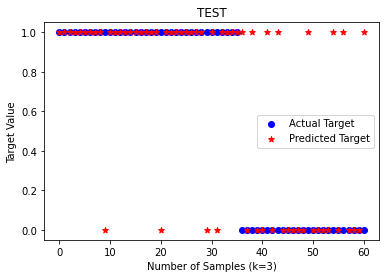

In [177]:
plt.scatter(np.arange(0,df2.shape[0],1), df2["Target_true_values"], c='blue', label='Actual Target')
plt.scatter(np.arange(0,df2.shape[0],1), df2["target"], c='red', marker='*', label='Predicted Target')
plt.xlabel('Number of Samples (k=3)')
plt.ylabel("Target Value")
plt.legend(loc='center right')
plt.title("TEST")
plt.show()

In [178]:
# Calculating the evaluation
n = df2.shape[0]
TP = sum((df2["target"] == df2["Target_true_values"]) & (df2["target"] == True))
TN = sum((df2["target"] == df2["Target_true_values"]) & (df2["target"]== False))
FN = sum(df2["target"] < df2["Target_true_values"])
FP = sum(df2["target"] > df2["Target_true_values"])
confusionMatrix = np.array([[TP/n, FN/n],[FP/n, TN/n]])
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 / ((1 / precision) + (1 / recall))
print('ConfusionMatrix =\n{}\n'.format(confusionMatrix))
print('Accuracy = \n{}\n'.format(accuracy))
print('Precision = \n {}\n.'.format(precision))
print('Recall = \n{}\n'.format(recall))
print('F1_score = \n{}\n'.format(f1_score))

ConfusionMatrix =
[[0.52459016 0.06557377]
 [0.13114754 0.27868852]]

Accuracy = 
0.8032786885245902

Precision = 
 0.8
.
Recall = 
0.8888888888888888

F1_score = 
0.8421052631578947



As we can see from the results, KNN leads to a better accuracy compared to Naive Bayes. However, the answer is highly depenedent to other factors. In some cases, Naive might response better, in some other the KNN. Both have their own advantages and disadvantages. The KNN is slower compared to Naive Bayes. Therefore, if we want accuracy to be higher, KNN has a better performance, but if our desire is to be fast, naive has a better performance.